Please Fill in your name below:

In [ ]:
NAME = "Somaia Ahmed Abdelrahman"

---

# Deep Learning
# Assignment 3: Convolutional Neural Networks

**Please follow the following instructions for your answers to be graded correctly**:
- Inside the functions, make sure to write your code between the comments "# YOUR CODE STARTS HERE " and "# YOUR CODE ENDS HERE ". **Do not** edit any code outside these comments inside the functions.
- You're allowed to edit the cells that don't contain function definition.
- You will encounter some locked (read-only) empty cells. Leave those as they are, you're not allowed to edit them.
- Before you submit your assignment, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

## Part 1: CNN

In [ ]:
import numpy
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras import utils
import matplotlib.pyplot as plt

### Data loading and preprocessing

In [ ]:
def load_cifar():
    '''
    Returns:
    X_train, y_train, X_test, y_test --> images should be normalized to the range 0-1. Labels should be one-hot encoded.
    '''

    # YOUR CODE STARTS HERE

    # Load the dataset
    (X_train, y_train), (X_test, y_test) = cifar10.load_data()

    # Normalize the data
    X_train = X_train.astype('float32') / 255.0
    X_test = X_test.astype('float32') / 255.0

    # one hot encoding

    y_train = utils.to_categorical(y_train)
    y_test = utils.to_categorical(y_test)

    # YOUR CODE ENDS HERE

    return X_train, y_train, X_test, y_test

### CNN model

In [ ]:
def CNN (learning_rate):
    '''
    Implement a 3 layer CNN with filter size 3x3, where num of filters 32, 64 and 128 added to the first, second and third layer respectively.
    Add a maxpool layer with pooling size (2,2) after each convolutional layer.
    The CNN is followed by a two dense layers where the num of nodes are 128 and 10 in the first and second dense layers (Use softmax at the last layer).
    Use SGD optimization function where the loss function is employing the categorical cross entropy to classify the images.

    Arguments:
    learning_rate

    Returns:
    model: the compiled cnn model
    '''

    # YOUR CODE STARTS HERE

    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), padding = 'same'),
        MaxPooling2D(pool_size=(2, 2)),

        Conv2D(64, (3, 3), activation='relu', padding = 'same'),
        MaxPooling2D(pool_size=(2, 2)),

        Conv2D(128, (3, 3), activation='relu', padding = 'same'),
        MaxPooling2D(pool_size=(2, 2)),

        Flatten(),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])

    # compile model
    optimizer = SGD(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    # YOUR CODE ENDS HERE

    return model

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.1914 - loss: 2.1913 - val_accuracy: 0.2949 - val_loss: 1.9211
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.3486 - loss: 1.8427 - val_accuracy: 0.3778 - val_loss: 1.6908
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.4220 - loss: 1.6156 - val_accuracy: 0.4343 - val_loss: 1.5590
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.4636 - loss: 1.5040 - val_accuracy: 0.4275 - val_loss: 1.5982
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.4931 - loss: 1.4203 - val_accuracy: 0.4077 - val_loss: 1.6608
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5197 - loss: 1.3528 - val_accuracy: 0.5288 - val_loss: 1.3054
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.5406 - loss: 1.2884 - val_accuracy: 0.4912 - val_loss: 1.4218
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.5681 - loss: 1.2223 - val_accuracy:

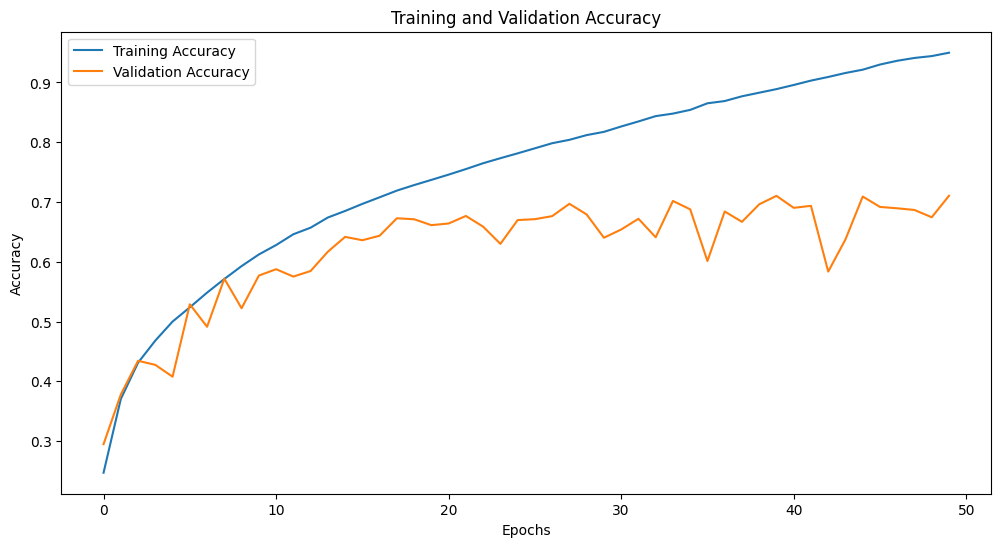

In [ ]:
# Fit your CNN model using test data as your validation data during training.
# Plot the training accuracy and validation accuracy (add legend to the plot)

# YOUR CODE STARTS HERE
X_train, y_train, X_test, y_test = load_cifar()
model = CNN(0.01)

history = model.fit(
    X_train, y_train,
    epochs = 50,
    batch_size = 64,
    validation_data = (X_test, y_test),
    verbose=1
)

# plot
plt.figure(figsize=(12,6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# YOUR CODE ENDS HERE

### DNN model

In [ ]:
def DNN(learning_rate):
    '''
    Implement a simple dense neural networks with 5 hidden layers of 512 rectified linear units each. Add a final output layer with softmax activation.

    Arguments:
    learning_rate

    Returns:
    model: the compiled model
    '''

    # YOUR CODE STARTS HERE
    model = Sequential([
        Flatten(),

        Dense(512, activation='relu'),
        Dense(512, activation='relu'),
        Dense(512, activation='relu'),
        Dense(512, activation='relu'),
        Dense(512, activation='relu'),

        Dense(10, activation='softmax'),

    ])

    optimizer= SGD(learning_rate=learning_rate)
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    # YOUR CODE ENDS HERE

    return model

Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.2324 - loss: 2.1061 - val_accuracy: 0.2216 - val_loss: 2.2236
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3518 - loss: 1.8126 - val_accuracy: 0.2322 - val_loss: 2.4183
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3927 - loss: 1.7012 - val_accuracy: 0.3698 - val_loss: 1.7496
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4210 - loss: 1.6188 - val_accuracy: 0.4221 - val_loss: 1.6148
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4382 - loss: 1.5759 - val_accuracy: 0.4230 - val_loss: 1.5794
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.4561 - loss: 1.5208 - val_accuracy: 0.4062 - val_loss: 1.6620
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4738 - loss: 1.4877 - val_accuracy: 0.4116 - val_loss: 1.6579
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4899 - loss: 1.4455 - val_accuracy: 0.

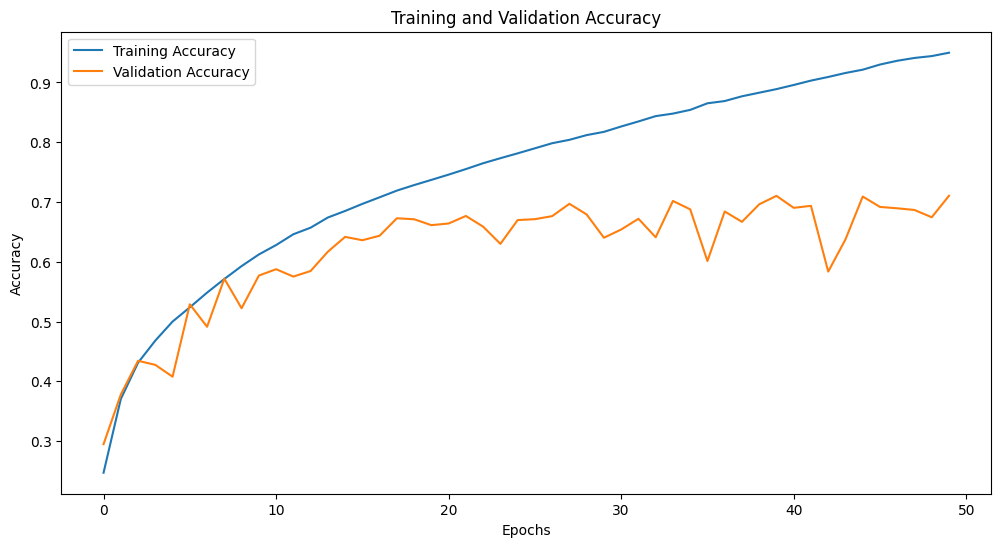

In [ ]:
# Fit your DNN model using test data as your validation data during training.
# Plot the training accuracy and validation accuracy (add legend to the plot)

# YOUR CODE STARTS HERE
model_dnn = DNN(0.01)

history_dnn = model_dnn.fit(
    X_train, y_train,
    epochs = 50,
    batch_size = 64,
    validation_data = (X_test, y_test),
    verbose=1
)

# plot
plt.figure(figsize=(12,6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
# YOUR CODE ENDS HERE

### Question: Compare between both CNN and DNN models in terms of the training curves and number of parameters.

| Feature                    | **CNN**                                                                     | **DNN**                                                                                       |
| -------------------------- | --------------------------------------------------------------------------- | --------------------------------------------------------------------------------------------- |
| **Learnable Parameters**   | **Fewer parameters** (usually in the range of ~1–2 million for this setup). | **Much more parameters** (tens of millions, since each neuron connects to every input pixel).
| **Training Accuracy Curve**   | Rises quickly and stabilizes at a high value (≈ 85–90% depending on epochs). | Also rises but may saturate early and fluctuate more.             |
| **Validation Accuracy Curve** | Tracks training accuracy closely (indicates better generalization).          | Often lower than training accuracy → strong overfitting tendency. |
| **Loss Curve**                | Decreases smoothly.                                                          | Decreases but may oscillate or flatten prematurely.               |



### Dropout

In [ ]:
def CNN_dropout(dropout_rate, learning_rate):
    '''
    Implement the same previous CNN architecture with adding dropout layers.

    Arguments:
    - dropout_rate
    - learning_rate

    returns:
    model: the compiled model
    '''
    # YOUR CODE STARTS HERE
    model = Sequential([
            Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), padding = 'same'),
            MaxPooling2D(pool_size=(2, 2)),
            Dropout(dropout_rate),

            Conv2D(64, (3, 3), activation='relu', padding = 'same'),
            MaxPooling2D(pool_size=(2, 2)),
            Dropout(dropout_rate),

            Conv2D(128, (3, 3), activation='relu', padding = 'same'),
            MaxPooling2D(pool_size=(2, 2)),
            Dropout(dropout_rate),

            Flatten(),
            Dense(128, activation='relu'),
            Dropout(dropout_rate),
            Dense(10, activation='softmax')
        ])

    # compile model
    optimizer = SGD(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    # YOUR CODE ENDS HERE

    return model

Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 14ms/step - accuracy: 0.1348 - loss: 2.2747 - val_accuracy: 0.2380 - val_loss: 2.0532
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.2466 - loss: 2.0349 - val_accuracy: 0.3268 - val_loss: 1.9170
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.3073 - loss: 1.9042 - val_accuracy: 0.3281 - val_loss: 1.8671
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.3531 - loss: 1.7688 - val_accuracy: 0.4112 - val_loss: 1.6554
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.3792 - loss: 1.6920 - val_accuracy: 0.4091 - val_loss: 1.6332
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.3975 - loss: 1.6375 - val_accuracy: 0.4414 - val_loss: 1.5482
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.4176 - loss: 1.5885 - val_accuracy: 0.4422 - val_loss: 1.5430
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.4353 - loss: 1.5411 - val_accuracy: 

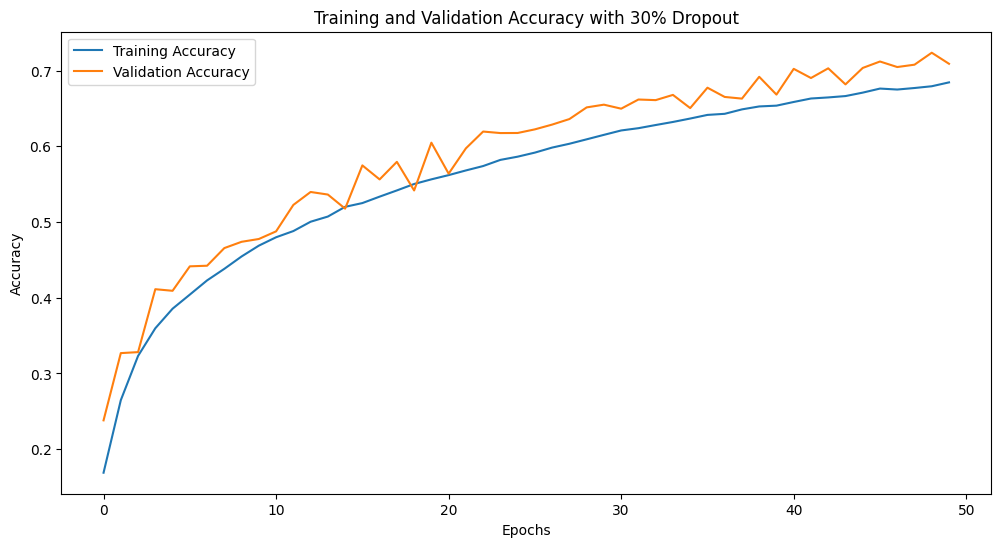

In [ ]:
# Fit your modified CNN model (CNN with dropout) using test data as your validation data during training.
# Plot the training accuracy and validation accuracy (add legend to the plot)


# YOUR CODE STARTS HERE
model = CNN_dropout(0.3, 0.01)

history = model.fit(
    X_train, y_train,
    epochs = 50,
    batch_size = 64,
    validation_data = (X_test, y_test),
    verbose=1
)

# plot
plt.figure(figsize=(12,6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy with 30% Dropout')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
# YOUR CODE ENDS HERE

Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - accuracy: 0.1204 - loss: 2.3014 - val_accuracy: 0.1584 - val_loss: 2.2309
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.2040 - loss: 2.1122 - val_accuracy: 0.2748 - val_loss: 2.0546
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.2462 - loss: 2.0240 - val_accuracy: 0.2954 - val_loss: 1.9489
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.2762 - loss: 1.9376 - val_accuracy: 0.2670 - val_loss: 1.9953
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.3068 - loss: 1.8575 - val_accuracy: 0.3135 - val_loss: 1.8832
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.3318 - loss: 1.7973 - val_accuracy: 0.3381 - val_loss: 1.8190
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.3500 - loss: 1.7567 - val_accuracy: 0.3934 - val_loss: 1.7176
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.3664 - loss: 1.7165 - val_accuracy: 

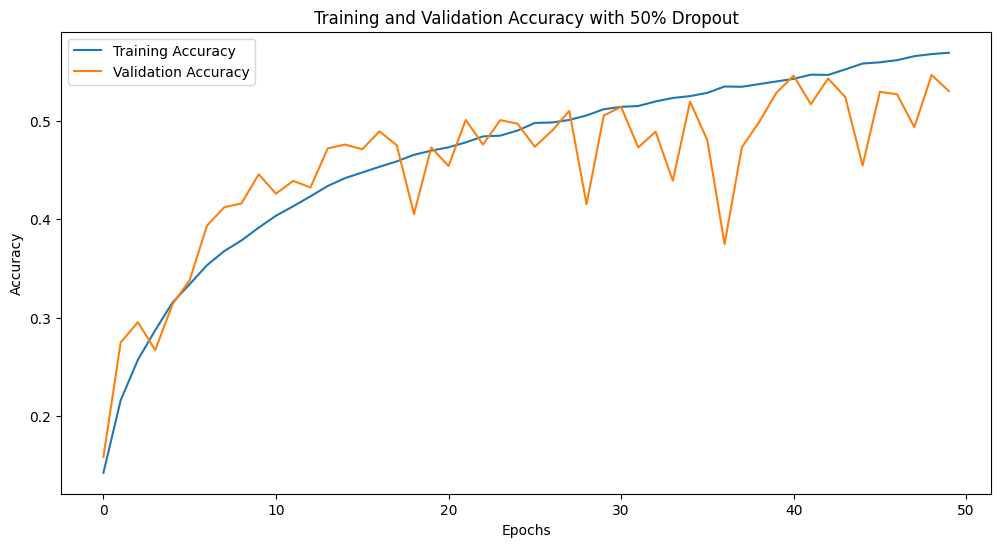

In [ ]:
# Repeat using a different dropout rate

# YOUR CODE STARTS HERE
model = CNN_dropout(0.5, 0.01)

history = model.fit(
    X_train, y_train,
    epochs = 50,
    batch_size = 64,
    validation_data = (X_test, y_test),
    verbose=1
)

# plot
plt.figure(figsize=(12,6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy with 50% Dropout')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
# YOUR CODE ENDS HERE

### Comment on the results using different dropout rates and compare with the previous models.

* Dropout = 0.3 → optimal balance between bias and variance; highest validation accuracy and smooth training.

* Dropout = 0.5 → too aggressive, causing underfitting and slower convergence.

* Compared to earlier models, CNN with moderate dropout clearly offers the best generalization and most reliable validation performance.

* CNNs (with or without dropout) outperform DNNs on image data because they preserve spatial information and require fewer parameters.

## Part 2: UNet

You'll be building your own U-Net.

### 1 - Packages

Run the cell below to import all the libraries you'll need:

In [ ]:
import tensorflow as tf
import numpy as np

from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv2DTranspose
from tensorflow.keras.layers import concatenate

### 2 - Load and Split the Data

- Download the data from Lyft Semantic Segmentation Challenge from Kaggle.

    - Link:https://www.kaggle.com/datasets/kumaresanmanickavelu/lyft-udacity-challenge

- Use the **DataA**  folder only.

- You can run on Colab.
    - upload data to drive
    - OR fetch the data from Kaggle to Colab directly (easier)
    
- OR You can run on Kaggle directly

In [ ]:
import os
import numpy as np
import imageio

import matplotlib.pyplot as plt
%matplotlib inline

path = '/kaggle/input/lyft-udacity-challenge/dataA/dataA/'

image_path = os.path.join(path, 'CameraRGB/')
mask_path = os.path.join(path, 'CameraSeg/')
image_list = os.listdir(image_path)
mask_list = os.listdir(mask_path)
image_list = [image_path+i for i in image_list]
mask_list = [mask_path+i for i in mask_list]

In [ ]:
len(image_list)

1000

#### Check out the some of the unmasked and masked images from the dataset:

/tmp/ipykernel_37/668669267.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(image_list[N])
/tmp/ipykernel_37/668669267.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  mask = imageio.imread(mask_list[N])


Text(0.5, 1.0, 'Segmentation')

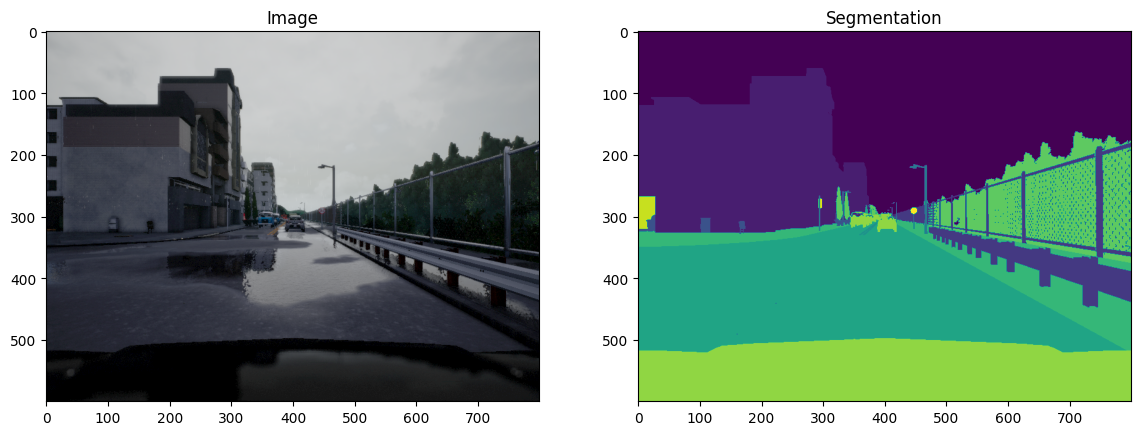

In [ ]:
N = 3
img = imageio.imread(image_list[N])
mask = imageio.imread(mask_list[N])

fig, arr = plt.subplots(1, 2, figsize=(14, 10))
arr[0].imshow(img)
arr[0].set_title('Image')
arr[1].imshow(mask[:, :, 0])
arr[1].set_title('Segmentation')

#### 2.1 - Split Your Dataset into Unmasked and Masked Images

In [ ]:
image_list_ds = tf.data.Dataset.list_files(image_list, shuffle=False)
mask_list_ds = tf.data.Dataset.list_files(mask_list, shuffle=False)

for path in zip(image_list_ds.take(3), mask_list_ds.take(3)):
    print(path)

I0000 00:00:1761860105.641254      37 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1761860105.641943      37 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


(<tf.Tensor: shape=(), dtype=string, numpy=b'/kaggle/input/lyft-udacity-challenge/dataA/dataA/CameraRGB/02_00_000.png'>, <tf.Tensor: shape=(), dtype=string, numpy=b'/kaggle/input/lyft-udacity-challenge/dataA/dataA/CameraSeg/02_00_000.png'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'/kaggle/input/lyft-udacity-challenge/dataA/dataA/CameraRGB/02_00_001.png'>, <tf.Tensor: shape=(), dtype=string, numpy=b'/kaggle/input/lyft-udacity-challenge/dataA/dataA/CameraSeg/02_00_001.png'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'/kaggle/input/lyft-udacity-challenge/dataA/dataA/CameraRGB/02_00_010.png'>, <tf.Tensor: shape=(), dtype=string, numpy=b'/kaggle/input/lyft-udacity-challenge/dataA/dataA/CameraSeg/02_00_010.png'>)


In [ ]:
image_filenames = tf.constant(image_list)
masks_filenames = tf.constant(mask_list)

dataset = tf.data.Dataset.from_tensor_slices((image_filenames, masks_filenames))

for image, mask in dataset.take(1):
    print(image)
    print(mask)

tf.Tensor(b'/kaggle/input/lyft-udacity-challenge/dataA/dataA/CameraRGB/F6-50.png', shape=(), dtype=string)
tf.Tensor(b'/kaggle/input/lyft-udacity-challenge/dataA/dataA/CameraSeg/F6-50.png', shape=(), dtype=string)


#### 2.2 - Preprocess Your Data

In [ ]:
def process_path(image_path, mask_path):
    img = tf.io.read_file(image_path)
    img = tf.image.decode_png(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)

    mask = tf.io.read_file(mask_path)
    mask = tf.image.decode_png(mask, channels=3)
    mask = tf.math.reduce_max(mask, axis=-1, keepdims=True)
    return img, mask

def preprocess(image, mask):
    input_image = tf.image.resize(image, (96, 128), method='nearest')
    input_mask = tf.image.resize(mask, (96, 128), method='nearest')

    input_image = input_image / 255.

    return input_image, input_mask

image_ds = dataset.map(process_path)
processed_image_ds = image_ds.map(preprocess)

### 3 - U-Net

#### 3.1 - Model Details

<a href="https://ibb.co/zHjzVsC1"><img src="https://i.ibb.co/84THgMGJ/unet.png" alt="unet" border="0"></a>

**Contracting path** (Encoder containing downsampling steps):

Images are first fed through several convolutional layers which reduce height and width, while growing the number of channels.

The contracting path follows a regular CNN architecture, with convolutional layers, their activations, and pooling layers to downsample the image and extract its features. In detail, it consists of the repeated application of two 3 x 3 unpadded convolutions, each followed by a rectified linear unit (ReLU) and a 2 x 2 max pooling operation with stride 2 for downsampling. At each downsampling step, the number of feature channels is doubled.

**Crop function**: This step crops the image from the contracting path and concatenates it to the current image on the expanding path to create a skip connection.

**Expanding path** (Decoder containing upsampling steps):

The expanding path performs the opposite operation of the contracting path, growing the image back to its original size, while shrinking the channels gradually.

In detail, each step in the expanding path upsamples the feature map, followed by a 2 x 2 convolution (the transposed convolution). This transposed convolution halves the number of feature channels, while growing the height and width of the image.

Next is a concatenation with the correspondingly cropped feature map from the contracting path, and two 3 x 3 convolutions, each followed by a ReLU. You need to perform cropping to handle the loss of border pixels in every convolution.

**Final Feature Mapping Block**: In the final layer, a 1x1 convolution is used to map each 64-component feature vector to the desired number of classes. The channel dimensions from the previous layer correspond to the number of filters used, so when you use 1x1 convolutions, you can transform that dimension by choosing an appropriate number of 1x1 filters. When this idea is applied to the last layer, you can reduce the channel dimensions to have one layer per class.

The U-Net network has 23 convolutional layers in total.

#### 3.2 - Encoder (Downsampling Block)


<a href="https://ibb.co/BGGWBGc"><img src="https://i.ibb.co/XDD0tDj/encoder.png" alt="encoder" border="0"></a>
<caption><center> <u><b>Figure 3</u></b>: The U-Net Encoder up close <br> </center></caption>

The encoder is a stack of various conv_blocks:

Each `conv_block()` is composed of 2 **Conv2D** layers  with ReLU activations. We will apply **Dropout**, and **MaxPooling2D** to some conv_blocks, as you will verify in the following sections, specifically to the last two blocks of the downsampling.

The function will  return two tensors:
- `next_layer`: That will go into the next block.
- `skip_connection`: That will go into the corresponding decoding block.

**Note**: If `max_pooling=True`, the `next_layer` will be the output of the MaxPooling2D layer, but the `skip_connection` will be the output of the previously applied layer(Conv2D or Dropout, depending on the case). Else, both results will be identical.  

#### Exercise 1 - conv_block

Implement `conv_block(...)`. Here are the instructions for each step in the `conv_block`, or contracting block:

* Add 2 **Conv2D** layers with `n_filters` filters with `kernel_size` set to 3, `kernel_initializer` set to ['he_normal'](https://www.tensorflow.org/api_docs/python/tf/keras/initializers/HeNormal), `padding` set to 'same' and 'relu' activation.
* if `dropout_prob` > 0, then add a Dropout layer with parameter `dropout_prob`
* If `max_pooling` is set to True, then add a MaxPooling2D layer with 2x2 pool size

In [ ]:
def conv_block(inputs=None, n_filters=32, dropout_prob=0, max_pooling=True):
    """
    Convolutional downsampling block

    Arguments:
        inputs -- Input tensor
        n_filters -- Number of filters for the convolutional layers
        dropout_prob -- Dropout probability
        max_pooling -- Use MaxPooling2D to reduce the spatial dimensions of the output volume
    Returns:
        next_layer, skip_connection --  Next layer and skip connection outputs
    """

    # YOUR CODE STARTS HERE
    conv=Conv2D(filters=n_filters, kernel_size=3, activation='relu',
               kernel_initializer='he_normal', padding='same')(inputs)
    conv=Conv2D(filters=n_filters, kernel_size=3, activation='relu',
               kernel_initializer='he_normal', padding='same')(conv)
    # YOUR CODE ENDS HERE

    # if dropout_prob > 0 add a dropout layer, with the variable dropout_prob as parameter
    if dropout_prob > 0:
         # YOUR CODE STARTS HERE
        conv = Dropout(dropout_prob)(conv)

         # YOUR CODE ENDS HERE


    # if max_pooling is True add a MaxPooling2D with 2x2 pool_size
    if max_pooling:
        # YOUR CODE STARTS HERE
        next_layer = MaxPooling2D(pool_size=(2, 2))(conv)
        # YOUR CODE ENDS HERE

    else:
        next_layer = conv

    skip_connection = conv

    return next_layer, skip_connection

#### 3.3 - Decoder (Upsampling Block)

The decoder, or upsampling block, upsamples the features back to the original image size. At each upsampling level, you'll take the output of the corresponding encoder block and concatenate it before feeding to the next decoder block.


<a href="https://ibb.co/BHhz3VF1"><img src="https://i.ibb.co/1YCvQfjS/decoder.png" alt="decoder" border="0"></a>

There are two new components in the decoder: `up` and `merge`. These are the transpose convolution and the skip connections. In addition, there are two more convolutional layers set to the same parameters as in the encoder.

Here you'll encounter the `Conv2DTranspose` layer, which performs the inverse of the `Conv2D` layer. You can read more about it [here.](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2DTranspose)


#### Exercise 2 - upsampling_block

Implement `upsampling_block(...)`.

For the function `upsampling_block`:
* Takes the arguments `expansive_input` (which is the input tensor from the previous layer) and `contractive_input` (the input tensor from the previous skip layer)
* The number of filters here is the same as in the downsampling block you completed previously
* Your `Conv2DTranspose` layer will take `n_filters` with shape (3,3) and a stride of (2,2), with padding set to `same`. It's applied to `expansive_input`, or the input tensor from the previous layer.

This block is also where you'll concatenate the outputs from the encoder blocks, creating skip connections.

* Concatenate your Conv2DTranspose layer output to the contractive input, with an `axis` of 3. In general, you can concatenate the tensors in the order that you prefer. But for the grader, it is important that you use `[up, contractive_input]`

For the final component, set the parameters for two Conv2D layers to the same values that you set for the two Conv2D layers in the encoder (ReLU activation, He normal initializer, `same` padding).


In [ ]:
def upsampling_block(expansive_input, contractive_input, n_filters=32):
    """
    Convolutional upsampling block

    Arguments:
        expansive_input -- Input tensor from previous layer
        contractive_input -- Input tensor from previous skip layer
        n_filters -- Number of filters for the convolutional layers
    Returns:
        conv -- Tensor output
    """
    # YOUR CODE STARTS HERE
    up = Conv2DTranspose(filters = n_filters,
                        kernel_size=3,
                        strides=(2,2),
                        padding='same')(expansive_input)

    merge = concatenate([up, contractive_input], axis=3)

    conv=Conv2D(filters=n_filters, kernel_size=3, activation='relu',
                   kernel_initializer='he_normal', padding='same')(merge)
    conv=Conv2D(filters=n_filters, kernel_size=3, activation='relu',
                   kernel_initializer='he_normal', padding='same')(conv)

    # YOUR CODE ENDS HERE

    return conv

#### 3.4 - Build the Model

This is where you'll put it all together, by chaining the encoder, bottleneck, and decoder! You'll need to specify the number of output channels, which for this particular set would be 23. That's because there are **23 possible labels for each pixel in this self-driving car dataset.**

#### Exercise 3 - unet_model

For the function `unet_model`, specify the input shape, number of filters, and number of classes (13 in this case).

For the first half of the model:

* Begin with a conv block that takes the inputs of the model and the number of filters
* Then, chain the first output element of each block to the input of the next convolutional block
* Next, double the number of filters at each step
* Beginning with `conv_block4`, add `dropout` of 0.3
* For the final conv_block, set `dropout` to 0.3 again, and turn off max pooling. (Here `n_filters=n_filters* 16`)

For the second half:
* From here, at each step, use half the number of filters of the previous block
* Use cblock5 as expansive_input and cblock4 as contractive_input, with `n_filters` * 8. This is your bottleneck layer.
* Chain the output of the previous block as expansive_input and the corresponding contractive block output.
* Note that you must use the second element of the contractive block before the max pooling layer.
* `conv9` is a Conv2D layer with ReLU activation, He normal initializer, `same` padding
* Finally, `conv10` is a Conv2D that takes the number of classes as the filter, a kernel size of 1, and "same" padding. The output of `conv10` is the output of your model.

In [ ]:
def unet_model(input_size=(96, 128, 3), n_filters=32, n_classes=13):
    """
    Unet model

    Arguments:
        input_size -- Input shape
        n_filters -- Number of filters for the convolutional layers
        n_classes -- Number of output classes
    Returns:
        model -- tf.keras.Model
    """
    inputs = Input(input_size)
    # Contracting Path (encoding)
    # Add a conv_block with the inputs of the unet_ model and n_filters
    # YOUR CODE STARTS HERE
    cblock1 = conv_block(inputs, n_filters=n_filters, dropout_prob=0, max_pooling=True)
    cblock2 = conv_block(cblock1[0], n_filters=n_filters*2, dropout_prob=0, max_pooling=True)
    cblock3 = conv_block(cblock2[0], n_filters=n_filters*4, dropout_prob=0, max_pooling=True)
    cblock4 = conv_block(cblock3[0], n_filters=n_filters*8, dropout_prob=0.3, max_pooling=True)
    cblock5 = conv_block(cblock4[0], n_filters=n_filters*16, dropout_prob=0.3, max_pooling=False)
    # YOUR CODE ENDS HERE

    # Expanding Path (decoding)
    # Add the first upsampling_block.
    # From here,at each step, use half the number of filters of the previous block
    # Use the cblock5[0] as expansive_input and cblock4[1] as contractive_input and n_filters * 8
    # YOUR CODE STARTS HERE
    ublock6 = upsampling_block(cblock5[0],cblock4[1], n_filters=n_filters*8)
    ublock7 = upsampling_block(ublock6,cblock3[1], n_filters=n_filters*4)
    ublock8 = upsampling_block(ublock7,cblock2[1], n_filters=n_filters*2)
    ublock9 = upsampling_block(ublock8,cblock1[1], n_filters=n_filters)

    # YOUR CODE ENDS HERE

    conv9 = Conv2D(n_filters,
                 3,
                 activation='relu',
                 padding='same',
                 kernel_initializer='he_normal')(ublock9)

    # Add a Conv2D layer with n_classes filter, kernel size of 1 and a 'same' padding
    # YOUR CODE STARTS HERE
    conv10 = Conv2D(n_classes,
                 1,
                 padding='same',
                 activation='softmax')(conv9)
    # YOUR CODE ENDS HERE

    model = tf.keras.Model(inputs=inputs, outputs=conv10)

    return model

#### 3.5 - Set Model Dimensions

In [ ]:
img_height = 96
img_width = 128
num_channels = 3

unet = unet_model((img_height, img_width, num_channels))

#### Check out the model summary below!

In [ ]:
unet.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 96, 128,   │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_42 (Conv2D)  │ (None, 96, 128,   │        896 │ input_layer_4[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_43 (Conv2D)  │ (None, 96, 128,   │      9,248 │ conv2d_42[0][0]   │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_16    │ (None, 48, 64,    │          0 │ conv2d_43[0][0]   │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_44 (Conv2D)  │ (None, 48, 64,    │     18,496 │ max_pooling2d_16… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_45 (Conv2D)  │ (None, 48, 64,    │     36,928 │ conv2d_44[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_17    │ (None, 24, 32,    │          0 │ conv2d_45[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_46 (Conv2D)  │ (None, 24, 32,    │     73,856 │ max_pooling2d_17… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_47 (Conv2D)  │ (None, 24, 32,    │    147,584 │ conv2d_46[0][0]   │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_18    │ (None, 12, 16,    │          0 │ conv2d_47[0][0]   │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_48 (Conv2D)  │ (None, 12, 16,    │    295,168 │ max_pooling2d_18… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_49 (Conv2D)  │ (None, 12, 16,    │    590,080 │ conv2d_48[0][0]   │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_8 (Dropout) │ (None, 12, 16,    │          0 │ conv2d_49[0][0]   │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_19    │ (None, 6, 8, 256) │          0 │ dropout_8[0][0]   │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_50 (Conv2D)  │ (None, 6, 8, 512) │  1,180,160 │ max_pooling2d_19… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_51 (Conv2D)  │ (None, 6, 8, 512) │  2,359,808 │ conv2d_50[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_9 (Dropout) │ (None, 6, 8, 512) │          0 │ conv2d_51[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose_4  │ (None, 12, 16,    │  1,179,904 │ dropout_9[0][0] 

 Total params: 8,640,141 (32.96 MB)

 Trainable params: 8,640,141 (32.96 MB)

 Non-trainable params: 0 (0.00 B)

#### 3.6 - Loss Function

In semantic segmentation, you need as many masks as you have object classes. In the dataset you're using, each pixel in every mask has been assigned a single integer probability that it belongs to a certain class, from 0 to num_classes-1. The correct class is the layer with the higher probability.

This is different from categorical crossentropy, where the labels should be one-hot encoded (just 0s and 1s). Here, you'll use sparse categorical crossentropy as your loss function, to perform pixel-wise multiclass prediction. Sparse categorical crossentropy is more efficient than other loss functions when you're dealing with lots of classes.

In [ ]:
unet.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### 3.7 - Dataset Handling

Below, define a function that allows you to display both an input image, and its ground truth: the true mask. The true mask is what your trained model output is aiming to get as close to as possible.

In [ ]:
def display(display_list):
    plt.figure(figsize=(15, 15))

    title = ['Input Image', 'True Mask', 'Predicted Mask']

    for i in range(len(display_list)):
        plt.subplot(1, len(display_list), i+1)
        plt.title(title[i])
        plt.imshow(tf.keras.preprocessing.image.array_to_img(display_list[i]))
        plt.axis('off')
    plt.show()

(600, 800, 1)


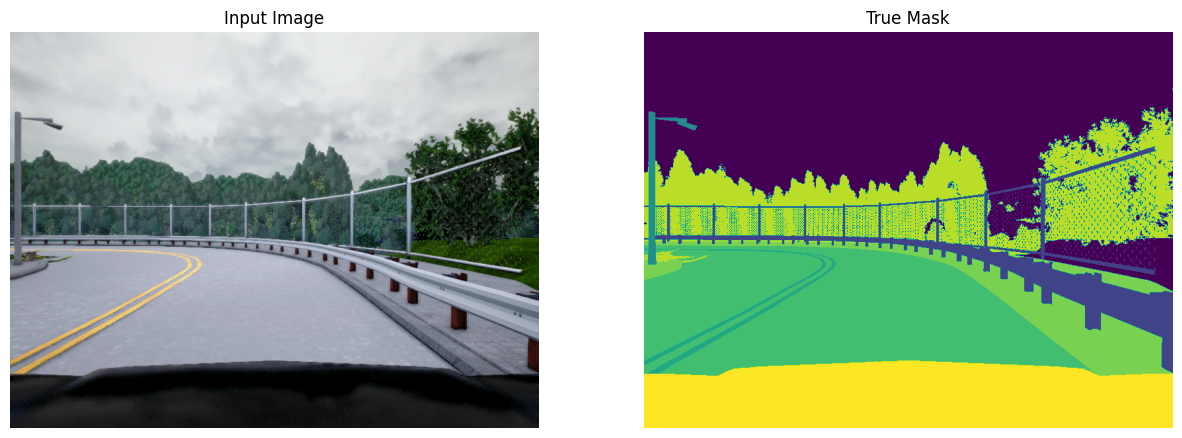

In [ ]:
for image, mask in image_ds.take(1):
    sample_image, sample_mask = image, mask
    print(mask.shape)
display([sample_image, sample_mask])

(96, 128, 1)


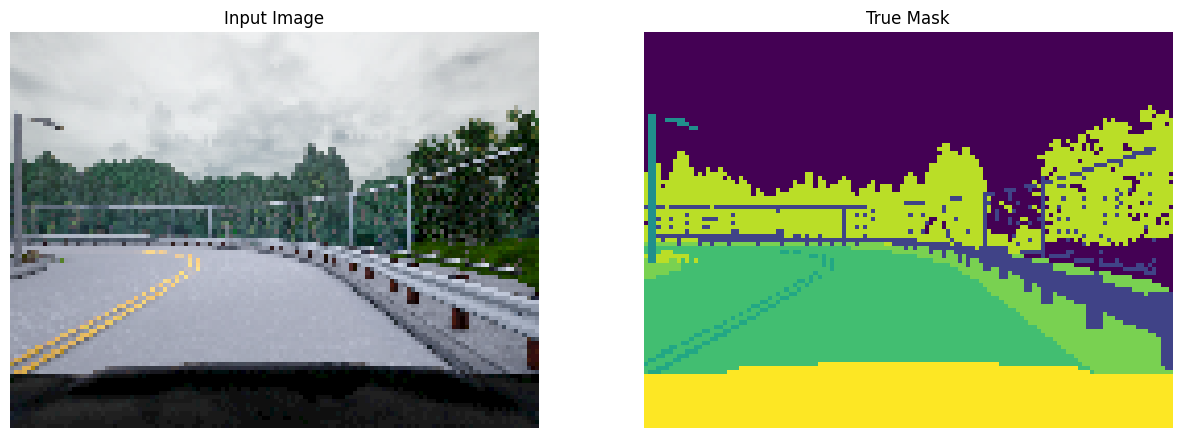

In [ ]:
for image, mask in processed_image_ds.take(1):
    sample_image, sample_mask = image, mask
    print(mask.shape)
display([sample_image, sample_mask])

### 4 - Train the Model

In [ ]:
EPOCHS = 40
BUFFER_SIZE = 500
BATCH_SIZE = 32
processed_image_ds.batch(BATCH_SIZE)
train_dataset = processed_image_ds.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
print(processed_image_ds.element_spec)
model_history = unet.fit(train_dataset, epochs=EPOCHS)

(TensorSpec(shape=(96, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(96, 128, 1), dtype=tf.uint8, name=None))
Epoch 1/40


/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/nn.py:708: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
I0000 00:00:1761861759.154816     110 service.cc:148] XLA service 0x7b9c60001e40 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1761861759.156511     110 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1761861759.156547     110 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
W0000 00:00:1761861759.823408     110 assert_op.cc:38] Ignoring Assert operator compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/assert_equal_1/Assert/Assert
I0000 00:00:1761861760.334764     110 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:176

31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step - accuracy: 0.2642 - loss: 2.5252

W0000 00:00:1761861789.454904     108 assert_op.cc:38] Ignoring Assert operator compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/assert_equal_1/Assert/Assert


32/32 ━━━━━━━━━━━━━━━━━━━━ 58s 656ms/step - accuracy: 0.2658 - loss: 2.5200
Epoch 2/40
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 140ms/step - accuracy: 0.3139 - loss: 1.9324
Epoch 3/40
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 141ms/step - accuracy: 0.5205 - loss: 1.3796
Epoch 4/40
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 140ms/step - accuracy: 0.6593 - loss: 0.9107
Epoch 5/40
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 141ms/step - accuracy: 0.6995 - loss: 0.8119
Epoch 6/40
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 141ms/step - accuracy: 0.7639 - loss: 0.6808
Epoch 7/40
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 141ms/step - accuracy: 0.7769 - loss: 0.6152
Epoch 8/40
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 142ms/step - accuracy: 0.7819 - loss: 0.6031
Epoch 9/40
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 142ms/step - accuracy: 0.7903 - loss: 0.5810
Epoch 10/40
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 142ms/step - accuracy: 0.7926 - loss: 0.5737
Epoch 11/40
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 143ms/step - accuracy: 0.8034 - loss: 0.5514
Epoch 12/40
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 143ms/step - accurac

#### 4.1 - Create Predicted Masks

Now, define a function that uses `tf.argmax` in the axis of the number of classes to return the index with the largest value and merge the prediction into a single image:

In [ ]:
def create_mask(pred_mask):
    pred_mask = tf.argmax(pred_mask, axis=-1)
    pred_mask = pred_mask[..., tf.newaxis]
    return pred_mask[0]

#### 4.2 - Plot Model Accuracy

Let's see how your model did!

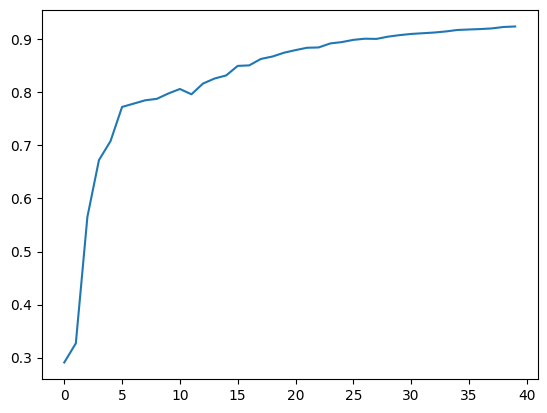

In [ ]:
plt.plot(model_history.history["accuracy"])

#### 4.3 - Show Predictions

Next, check your predicted masks against the true mask and the original input image:

In [ ]:
def show_predictions(dataset=None, num=1):
    """
    Displays the first image of each of the num batches
    """
    if dataset:
        for image, mask in dataset.take(num):
            pred_mask = unet.predict(image)
            display([image[0], mask[0], create_mask(pred_mask)])
    else:
        display([sample_image, sample_mask,
             create_mask(unet.predict(sample_image[tf.newaxis, ...]))])

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


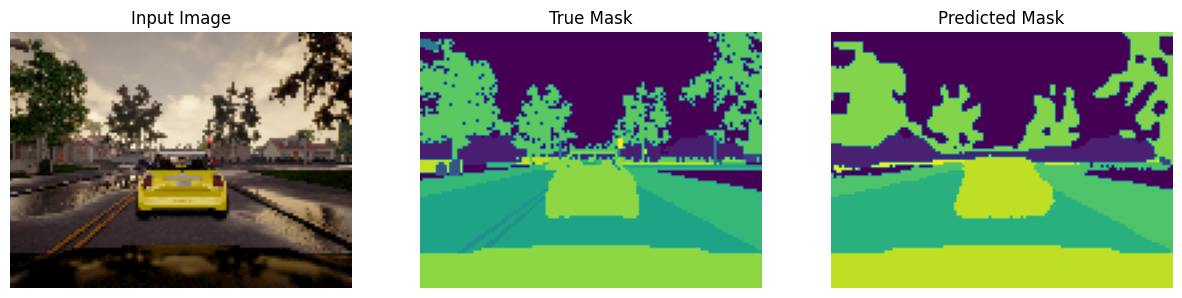

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


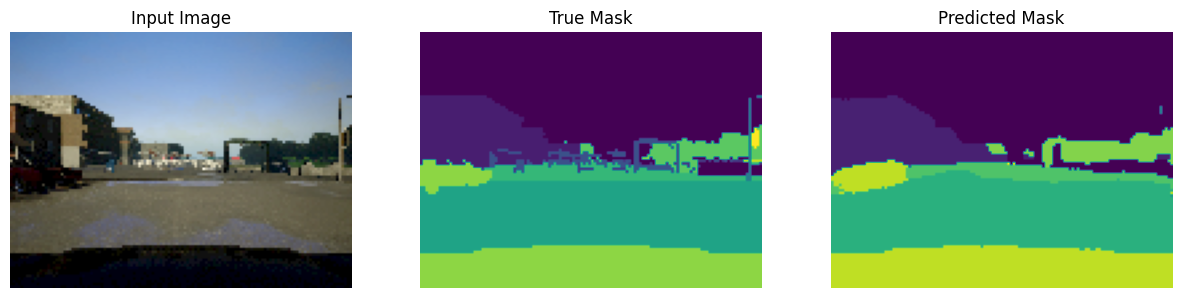

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


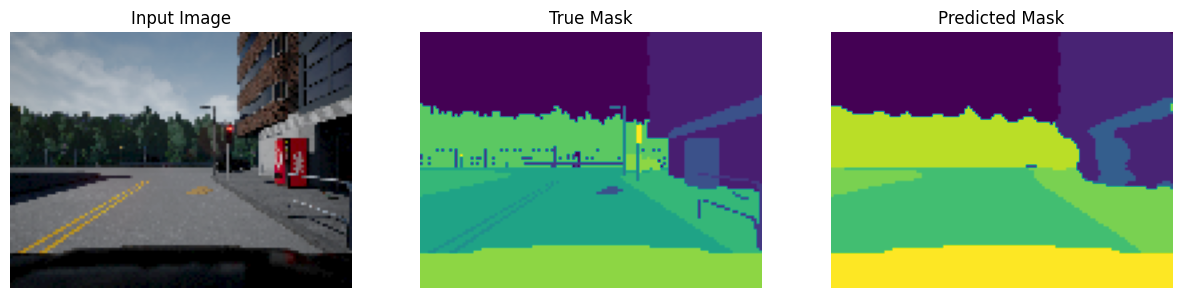

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


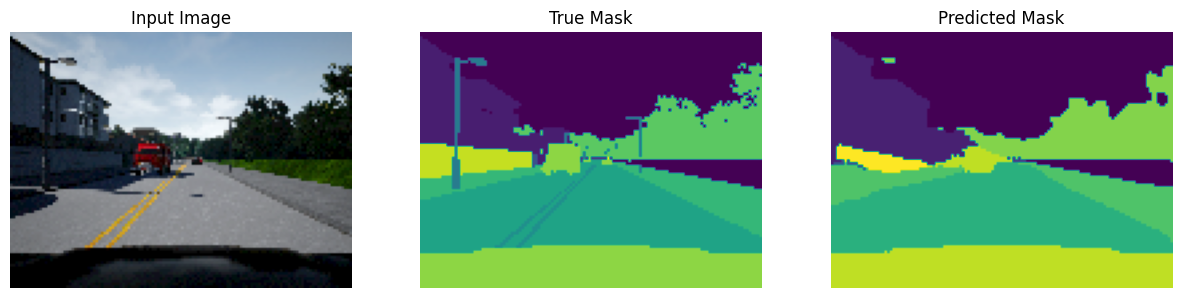

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


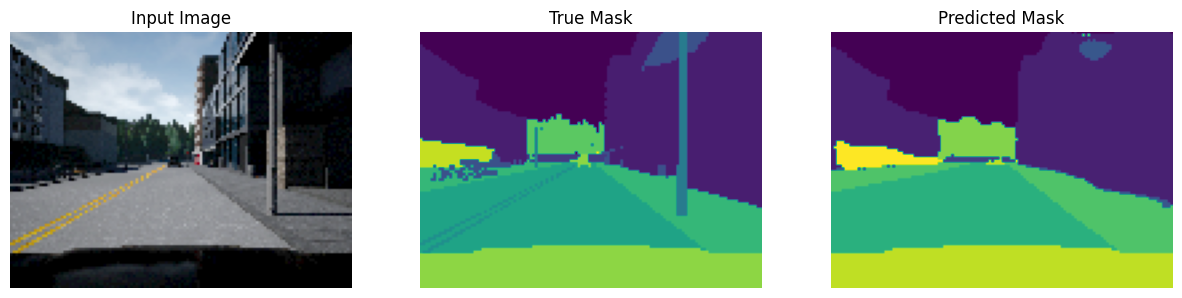

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


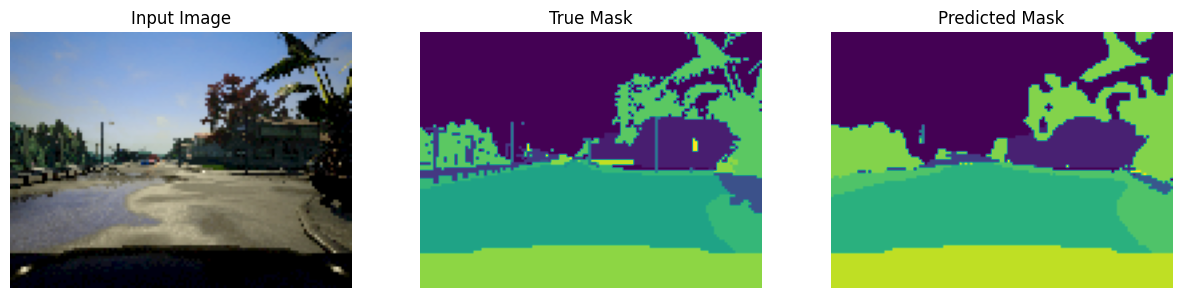

In [ ]:
show_predictions(train_dataset, 6)